In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
#!pip3 install certifi
#!/Applications/Python\ 3.11/Install\ Certificates.command

In [3]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
classes[9]

'truck'

In [11]:
def plot_smaple(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x_train[index])
    plt.xlabel(classes[y[index]])
    

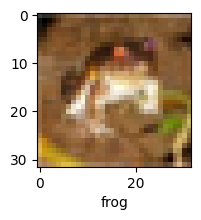

In [12]:
plot_smaple(x_train,y_train,0)

In [13]:
x_train = x_train / 255
x_test = x_test / 255

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.8138 - accuracy: 0.3553
Epoch 2/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6231 - accuracy: 0.4273
Epoch 3/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5440 - accuracy: 0.4560
Epoch 4/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4813 - accuracy: 0.4775
Epoch 5/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4339 - accuracy: 0.4928


In [15]:
ann.evaluate(x_train,y_train)

1563/1563 [==============================] - 7s 4ms/step - loss: 1.4826 - accuracy: 0.4704


[1.4826239347457886, 0.4704200029373169]

In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 5ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.46      0.58      0.51      1000
           1       0.70      0.42      0.53      1000
           2       0.44      0.13      0.20      1000
           3       0.40      0.24      0.30      1000
           4       0.38      0.46      0.42      1000
           5       0.48      0.26      0.33      1000
           6       0.63      0.33      0.43      1000
           7       0.30      0.81      0.44      1000
           8       0.54      0.69      0.60      1000
           9       0.55      0.54      0.54      1000

    accuracy                           0.45     10000
   macro avg       0.49      0.45      0.43     10000
weighted avg       0.49      0.45      0.43     10000



In [17]:
cnn = models.Sequential([
        #cnn
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
    
        layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),
    
        #dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

In [18]:

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4406 - accuracy: 0.4855
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0995 - accuracy: 0.6146
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9696 - accuracy: 0.6631
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8815 - accuracy: 0.6941
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8110 - accuracy: 0.7172
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7534 - accuracy: 0.7385
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7002 - accuracy: 0.7558
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6564 - accuracy: 0.7688
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6144 - accuracy: 0.7848
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - loss

In [20]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9388 - accuracy: 0.7011


[0.9388138651847839, 0.7010999917984009]

In [34]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

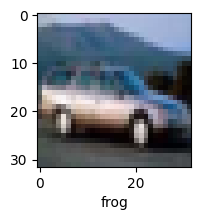

In [36]:
plot_smaple(x_test,y_test,4)

In [37]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.1601885e-04, 6.9698398e-03, 2.6620841e-03, 5.6328785e-01,
        4.2567070e-05, 4.0168279e-01, 1.0453962e-03, 4.2931377e-05,
        2.1121673e-02, 2.9288079e-03],
       [1.1738444e-03, 3.6945533e-02, 7.1632422e-07, 3.5609887e-06,
        3.7712930e-08, 3.9447215e-07, 7.5040610e-08, 8.8180245e-09,
        9.5961899e-01, 2.2568894e-03],
       [2.7723730e-01, 1.6150902e-01, 8.2737062e-04, 5.3378250e-03,
        1.2462097e-04, 3.6429954e-04, 7.5386102e-05, 9.9752702e-05,
        4.3608582e-01, 1.1833856e-01],
       [9.8328811e-01, 5.3636832e-05, 6.6981940e-03, 4.5209534e-05,
        3.1129362e-05, 2.6735893e-07, 6.2914827e-05, 9.6347152e-09,
        9.8178927e-03, 2.5559602e-06],
       [2.7125750e-06, 1.5995140e-03, 6.4717676e-03, 3.7439279e-02,
        7.7409250e-01, 9.3987947e-03, 1.6955800e-01, 1.6488326e-05,
        1.1701781e-03, 2.5081600e-04]], dtype=float32)

In [41]:
y_classes = [np.argmax(y_pred[0])for element in y_pred]
y_classes[:5]

[3, 3, 3, 3, 3]

In [42]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

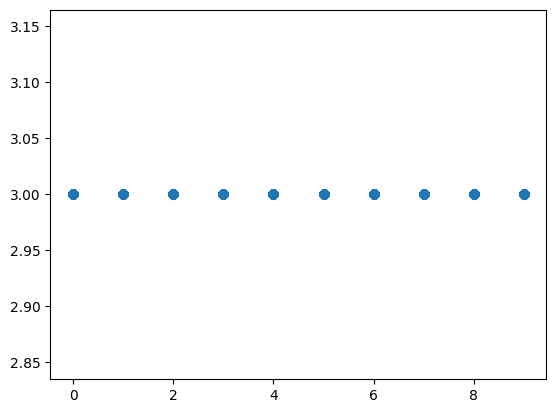

In [44]:
plt.scatter(y_test,y_classes)

In [ ]:
plot_smaple(x_test,y_test,0)
classes[y_test[0]]
print('Modify it into better version')